## Mini Project III

In [24]:
import pandas as pd
import numpy as np
# Ben cleans:
accounts_df = pd.read_csv('data/twm_accounts.csv', sep=';')
checking_acct_df = pd.read_csv('data/twm_checking_acct.csv', sep=';')
checking_tran_df = pd.read_csv('data/twm_checking_tran.csv', sep=';')
credit_acct_df = pd.read_csv('data/twm_credit_acct.csv', sep=';')
credit_tran_df = pd.read_csv('data/twm_credit_tran.csv', sep=';')

# Brittany cleans:
customer_df = pd.read_csv('data/twm_customer.csv', sep=';')
savings_acct_df = pd.read_csv('data/twm_savings_acct.csv', sep=';')
savings_tran_df = pd.read_csv('data/twm_savings_tran.csv', sep=';')
transactions_df = pd.read_csv('data/twm_transactions.csv', sep=';')

In [25]:
print(accounts_df.shape, checking_acct_df.shape, checking_tran_df.shape, credit_acct_df.shape, credit_tran_df.shape, customer_df.shape, savings_acct_df.shape, savings_tran_df.shape, transactions_df.shape, sep='\n')

(1409, 8)
(520, 9)
(46204, 10)
(468, 9)
(20167, 10)
(747, 15)
(421, 9)
(11189, 10)
(77580, 10)


## Accounts DF Cleaning

In [26]:
accounts_df.head(10)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
5,4561143213631020,1363102,CC,Y,30.11.1995,NaN,0.00,1000.00
6,4561143213633270,1363327,CC,Y,2.4.1995,NaN,0.00,3000.00
7,13628972,1362897,CK,Y,1.8.1995,NaN,152.12,52.33
8,4561143213632370,1363237,CC,N,24.1.1993,30.1.1995,8649.37,0.00
9,13627202,1362720,CK,Y,14.11.1995,NaN,1074.16,216.74


In [27]:
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [28]:
accounts_df.describe()

,acct_nbr,cust_id,starting_balance,ending_balance
count,1.409000e+03,1.409000e+03,1409.00000,1409.000000
mean,1.514986e+15,1.362989e+06,1435.35357,1011.754336
std,2.148991e+15,2.940584e+02,2186.69662,1559.986310
min,1.362480e+07,1.362480e+06,0.00000,0.000000
25%,1.362852e+07,1.362727e+06,189.23000,140.000000
50%,1.363252e+07,1.362985e+06,487.69000,553.610000
75%,4.561143e+15,1.363251e+06,2178.79000,1188.570000
max,4.561143e+15,1.363495e+06,27072.38000,22432.780000


In [29]:
# Convert dates to date format
accounts_df['acct_start_date']= pd.to_datetime(accounts_df['acct_start_date'], format='%d.%m.%Y')
accounts_df['acct_end_date'] = pd.to_datetime(accounts_df['acct_end_date'], format='%d.%m.%Y')
accounts_df.head(10)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,1995-12-10,NaT,1430.22,284.58
1,4561143213627090,1362709,CC,Y,1993-03-15,NaT,266.34,496.15
2,4561143213628360,1362836,CC,Y,1992-03-18,NaT,55.90,1000.00
3,13633112,1363311,CK,Y,1995-07-06,NaT,11017.13,968.46
4,4561143213633610,1363361,CC,Y,1994-06-17,NaT,849.37,462.28
5,4561143213631020,1363102,CC,Y,1995-11-30,NaT,0.00,1000.00
6,4561143213633270,1363327,CC,Y,1995-04-02,NaT,0.00,3000.00
7,13628972,1362897,CK,Y,1995-08-01,NaT,152.12,52.33
8,4561143213632370,1363237,CC,N,1993-01-24,1995-01-30,8649.37,0.00
9,13627202,1362720,CK,Y,1995-11-14,NaT,1074.16,216.74


In [30]:
accounts_df.isna().sum()

acct_nbr               0
cust_id                0
acct_type              0
account_active         0
acct_start_date        0
acct_end_date       1266
starting_balance       0
ending_balance         0
dtype: int64

In [31]:
# dummy variables for acct_type
type_df = accounts_df['acct_type']
df_dummy = pd.get_dummies(type_df)
df_dummy

,CC,CK,SV
0,False,False,True
1,True,False,False
2,True,False,False
3,False,True,False
4,True,False,False
...,...,...,...
1404,True,False,False
1405,True,False,False
1406,True,False,False
1407,False,False,True


In [32]:
accounts_df = pd.concat([accounts_df, df_dummy], axis=1)
accounts_df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,CC,CK,SV
0,13628063,1362806,SV,Y,1995-12-10,NaT,1430.22,284.58,False,False,True
1,4561143213627090,1362709,CC,Y,1993-03-15,NaT,266.34,496.15,True,False,False
2,4561143213628360,1362836,CC,Y,1992-03-18,NaT,55.90,1000.00,True,False,False
3,13633112,1363311,CK,Y,1995-07-06,NaT,11017.13,968.46,False,True,False
4,4561143213633610,1363361,CC,Y,1994-06-17,NaT,849.37,462.28,True,False,False


In [33]:
accounts_df.drop(columns=['acct_type'], inplace=True)

In [34]:
# convert account_active to numeric
accounts_df['account_active'].value_counts()

account_active
Y     1266
N      143
Name: count, dtype: int64

In [35]:
active_dict = {'Y ': 1, 'N ': 0}
accounts_df['account_active'] = accounts_df['account_active'].map(active_dict)

In [36]:
accounts_df['account_active'].value_counts()

account_active
1    1266
0     143
Name: count, dtype: int64

In [37]:
# duplicates check
accounts_df.duplicated().sum()

0

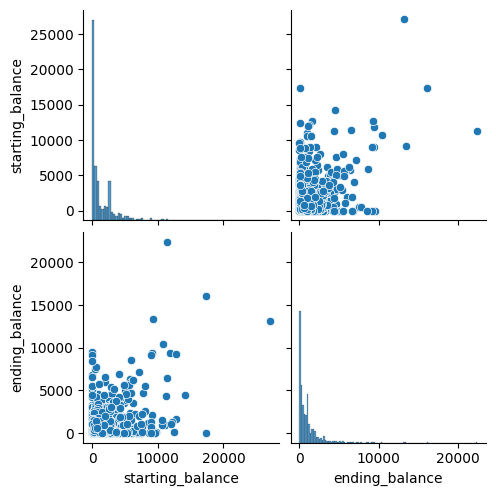

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(accounts_df[['starting_balance', 'ending_balance']])

In [39]:
accounts_df.to_csv('accounts_clean.csv', index=False)

## Checking Account DF Cleaning

In [40]:
checking_acct_df.head()

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [41]:
checking_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           520 non-null    int64  
 1   acct_nbr          520 non-null    int64  
 2   minimum_balance   520 non-null    int64  
 3   per_check_fee     520 non-null    float64
 4   account_active    520 non-null    object 
 5   acct_start_date   520 non-null    object 
 6   acct_end_date     52 non-null     object 
 7   starting_balance  520 non-null    float64
 8   ending_balance    520 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 36.7+ KB


In [42]:
# convert dates to datetime format
checking_acct_df['acct_start_date']= pd.to_datetime(checking_acct_df['acct_start_date'], format='%d.%m.%Y')
checking_acct_df['acct_end_date'] = pd.to_datetime(checking_acct_df['acct_end_date'], format='%d.%m.%Y')
checking_acct_df.head(10)

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,1986-11-11,NaT,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,1995-01-12,NaT,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,1994-03-19,NaT,2694.91,147.15
3,1362752,13627522,100,0.15,Y,1994-01-08,NaT,487.69,3.76
4,1363282,13632822,100,0.15,Y,1988-03-05,NaT,133.90,84.18
5,1362609,13626092,3000,0.00,N,1994-06-14,1995-09-29,2563.27,15.38
6,1363465,13634652,3000,0.00,Y,1995-12-29,NaT,2605.30,1632.35
7,1363078,13630782,100,0.15,Y,1995-09-12,NaT,301.36,167.83
8,1362588,13625882,200,0.15,Y,1992-09-12,NaT,230.67,5.87
9,1362670,13626702,3000,0.00,N,1990-03-22,1995-07-25,2697.49,106.94


In [43]:
# convert account_active to numeric
checking_acct_df['account_active'].value_counts()

account_active
Y     468
N      52
Name: count, dtype: int64

In [44]:
checking_acct_df['account_active'] = checking_acct_df['account_active'].map(active_dict)
checking_acct_df['account_active'].value_counts()

account_active
1    468
0     52
Name: count, dtype: int64

In [45]:
# check duplicates
checking_acct_df.duplicated().sum()

0

In [46]:
# check nulls
checking_acct_df.isna().sum()

cust_id               0
acct_nbr              0
minimum_balance       0
per_check_fee         0
account_active        0
acct_start_date       0
acct_end_date       468
starting_balance      0
ending_balance        0
dtype: int64

In [47]:
checking_acct_df.describe()

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
count,5.200000e+02,5.200000e+02,520.000000,520.000000,520.000000,520,52,520.000000,520.000000
mean,1.362992e+06,1.362993e+07,1355.384615,0.086250,0.900000,1993-08-13 14:15:41.538461568,1995-07-01 16:09:13.846153856,2170.671154,656.522692
min,1.362480e+06,1.362480e+07,100.000000,0.000000,0.000000,1986-01-13 00:00:00,1995-01-10 00:00:00,100.280000,0.000000
25%,1.362735e+06,1.362735e+07,100.000000,0.000000,1.000000,1992-08-15 18:00:00,1995-03-13 00:00:00,261.825000,46.232500
50%,1.362992e+06,1.362993e+07,200.000000,0.150000,1.000000,1994-03-25 12:00:00,1995-07-25 00:00:00,1056.145000,246.345000
75%,1.363252e+06,1.363252e+07,3000.000000,0.150000,1.000000,1995-03-24 00:00:00,1995-10-01 06:00:00,2804.915000,821.402500
max,1.363495e+06,1.363495e+07,3000.000000,0.150000,1.000000,1995-12-29 00:00:00,1995-12-29 00:00:00,27072.380000,13185.470000
std,2.954516e+02,2.954516e+03,1415.769243,0.074223,0.300289,NaN,NaN,2706.952110,1145.049961


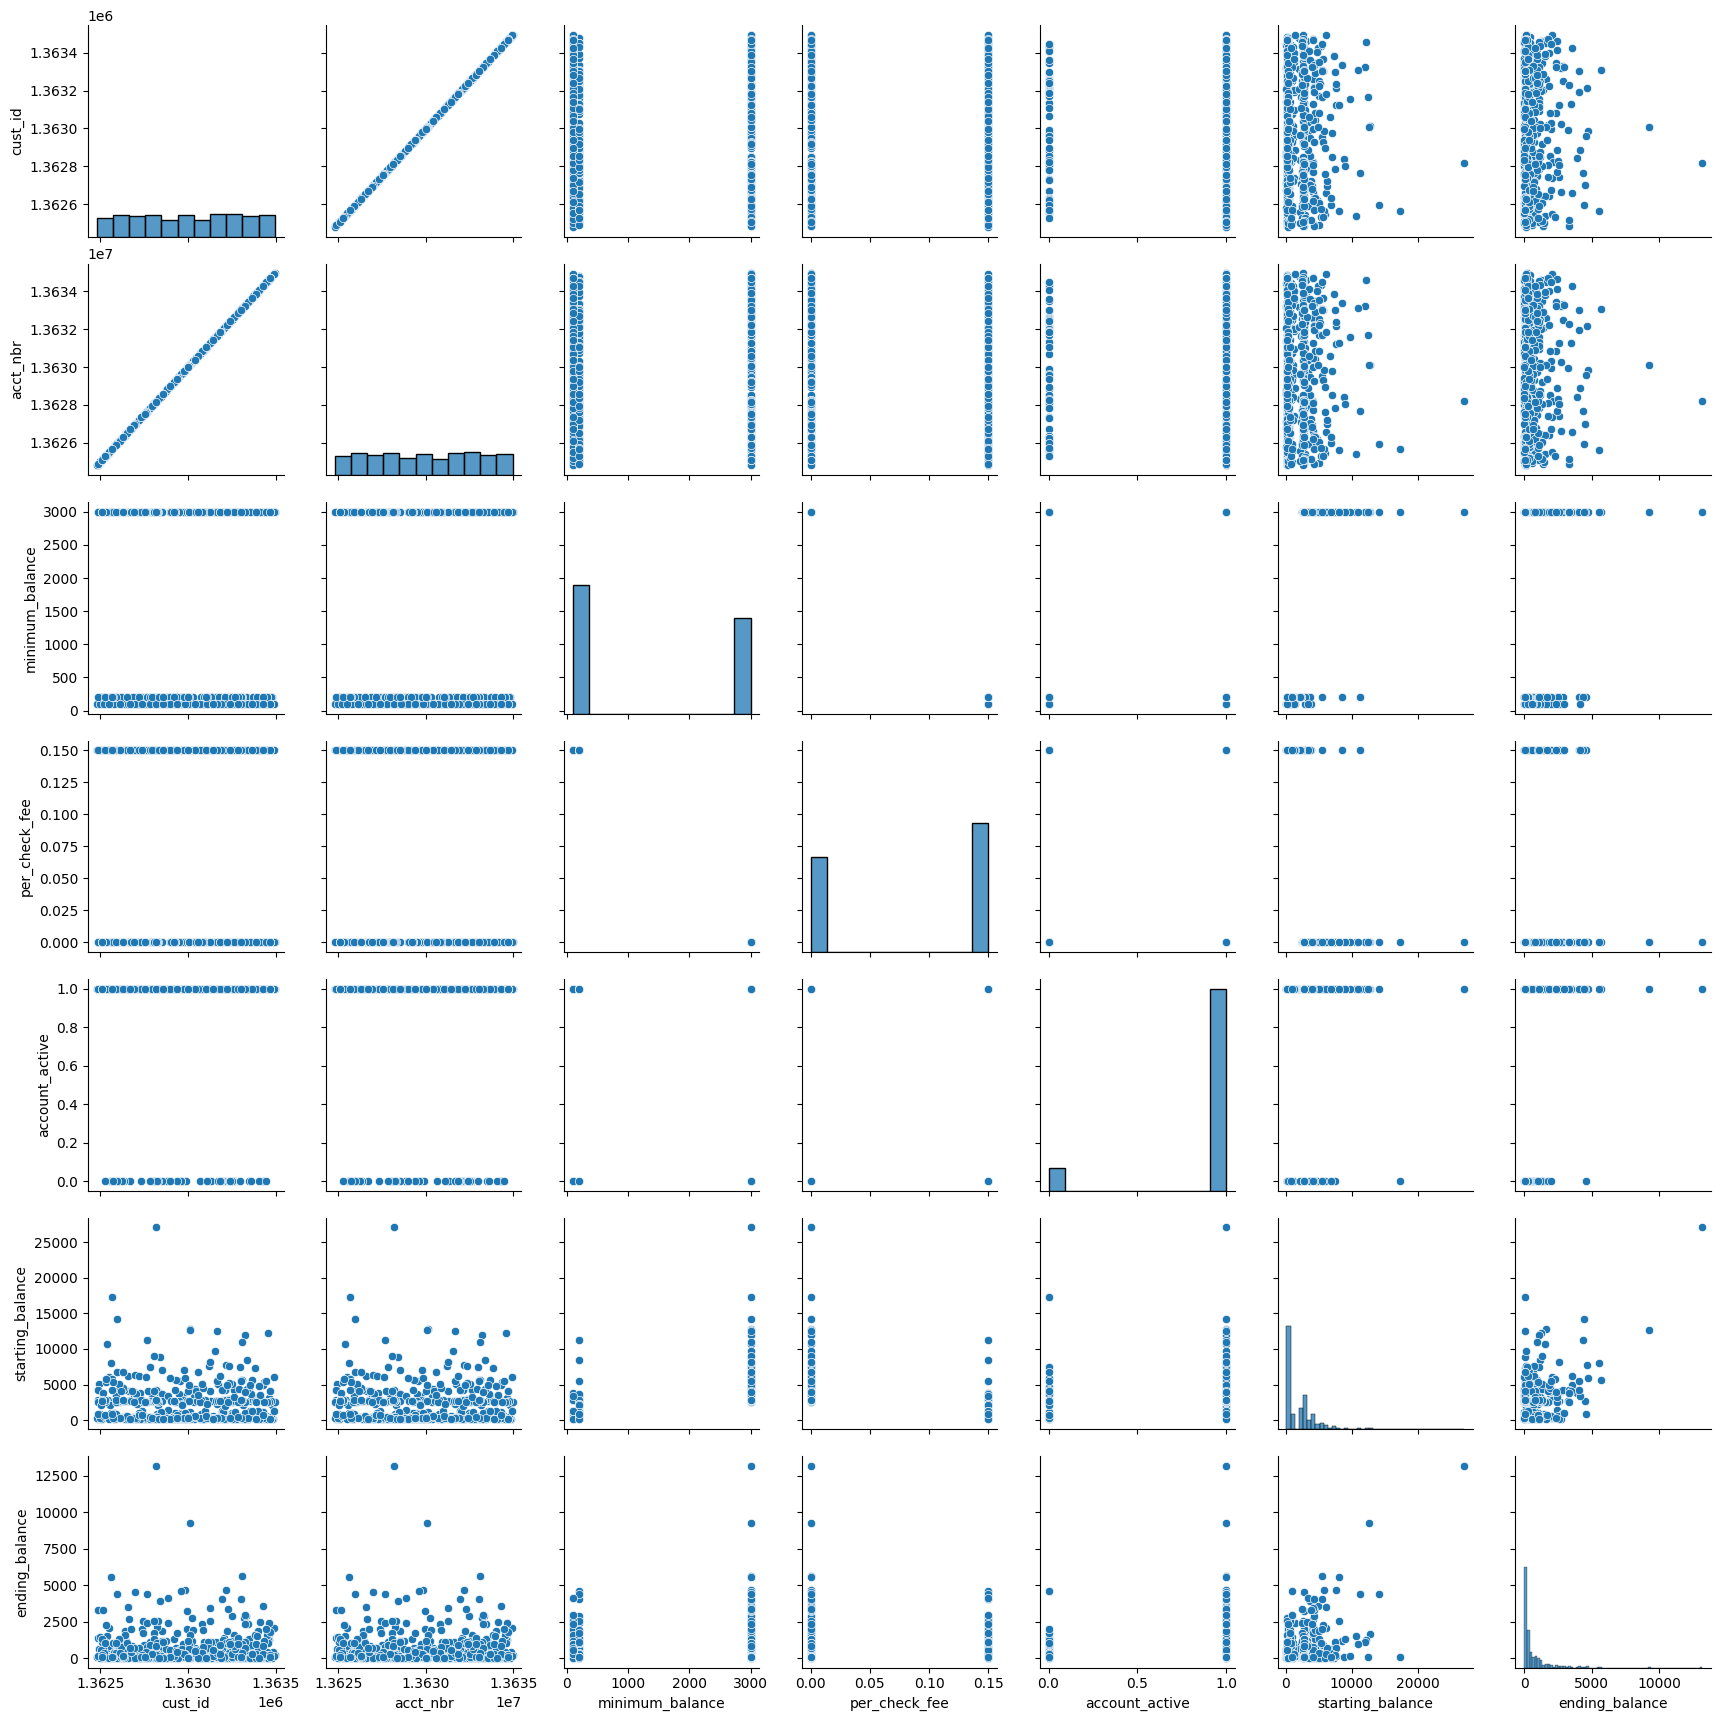

In [48]:
sns.pairplot(checking_acct_df)

In [49]:
checking_acct_df.to_csv('clean_data/checking_acct_clean.csv', index=False)

## Checking Tran df Cleaning

In [50]:
checking_tran_df = pd.read_csv('data/twm_checking_tran.csv', sep=';')

In [51]:
checking_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [52]:
checking_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        46204 non-null  int64  
 1   tran_id        46204 non-null  int64  
 2   tran_amt       46204 non-null  float64
 3   principal_amt  46204 non-null  float64
 4   interest_amt   46204 non-null  float64
 5   new_balance    46204 non-null  float64
 6   tran_date      46204 non-null  object 
 7   tran_time      46204 non-null  object 
 8   channel        46204 non-null  object 
 9   tran_code      46204 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 3.5+ MB


In [53]:
checking_tran_df.describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,4.620400e+04,46204.000000,46204.000000,46204.000000,46204.000000,46204.000000
mean,1.362998e+06,47.823175,-17.039341,-17.155132,0.115790,1152.162744
std,2.957497e+02,28.457501,246.405359,246.395847,0.845523,2009.266714
min,1.362480e+06,1.000000,-3312.410000,-3312.410000,0.000000,0.000000
25%,1.362740e+06,23.000000,-80.000000,-80.000000,0.000000,78.440000
50%,1.362997e+06,47.000000,-0.750000,-0.750000,0.000000,407.490000
75%,1.363262e+06,72.000000,0.000000,0.000000,0.000000,1522.675000
max,1.363495e+06,99.000000,5355.050000,5355.050000,27.300000,29868.390000


In [54]:
checking_tran_df.nunique()

cust_id            520
tran_id             99
tran_amt         20765
principal_amt    20153
interest_amt       624
new_balance      31912
tran_date          365
tran_time        19343
channel             10
tran_code            9
dtype: int64

In [55]:
# check for duplicates
checking_tran_df.duplicated().sum()

0

In [56]:
# convert date and time columns
checking_tran_df['tran_date'] = pd.to_datetime(checking_tran_df['tran_date'], format='%d.%m.%Y')
checking_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,1995-01-29,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,1995-07-02,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,1995-03-26,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,1995-01-29,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,1995-02-08,,P,WD


In [57]:
checking_tran_df['tran_time'] = pd.to_datetime(checking_tran_df['tran_time'], format='%H%M%S', errors='coerce').dt.time
checking_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,1995-01-29,NaT,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,1995-07-02,05:33:13,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,1995-03-26,08:03:04,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,1995-01-29,NaT,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,1995-02-08,NaT,P,WD


Investigating missing times

In [58]:
checking_tran_df[checking_tran_df['tran_time'].isna()]['channel'].value_counts()

channel
P     12198
       6028
M      1664
B         5
C         1
Name: count, dtype: int64

In [59]:
checking_tran_df['channel'].value_counts()

channel
P     12198
      10765
A      8221
B      5112
C      2700
E      2291
V      2114
M      1664
K      1131
H         8
Name: count, dtype: int64

In [60]:
checking_tran_df[(checking_tran_df['tran_time'].isna()) & (checking_tran_df['channel'].isin(['B ','C ']))]

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
661,1362836,65,112.68,112.68,0.0,160.69,1995-02-04,NaT,B,DP
6753,1363302,97,0.00,0.00,0.0,4268.22,1995-05-07,NaT,C,IQ
8411,1362480,88,236.69,236.69,0.0,248.24,1995-02-20,NaT,B,DP
16304,1363159,35,782.41,782.41,0.0,910.23,1995-07-05,NaT,B,DP
33562,1362905,32,228.24,228.24,0.0,1869.48,1995-11-06,NaT,B,DP
36324,1363348,34,0.00,0.00,0.0,350.28,1995-01-14,NaT,B,IQ


In [61]:
checking_tran_df['channel'].value_counts()

channel
P     12198
      10765
A      8221
B      5112
C      2700
E      2291
V      2114
M      1664
K      1131
H         8
Name: count, dtype: int64

In [62]:
#dropping missing times for channels B and C
checking_tran_df = checking_tran_df.drop(checking_tran_df[(checking_tran_df['channel'].isin(['B ', 'C ']) & checking_tran_df['tran_time'].isna())].index)

Investigating Missing Channels

In [63]:
checking_tran_df['channel'].unique()

array(['  ', 'A ', 'P ', 'C ', 'B ', 'V ', 'E ', 'M ', 'K ', 'H '],
      dtype=object)

In [64]:
checking_tran_df[checking_tran_df['channel']== '  ']

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.00,58.99,1995-01-29,NaT,,FK
8,1363253,62,0.94,0.00,0.94,751.88,1995-06-30,23:59:59,,IN
9,1363442,16,-0.75,-0.75,0.00,4776.26,1995-01-15,11:56:13,,FU
12,1363066,49,-0.15,-0.15,0.00,24.47,1995-02-23,NaT,,FK
18,1363433,70,-10.00,-10.00,0.00,1913.92,1995-11-30,23:59:59,,FP
...,...,...,...,...,...,...,...,...,...,...
46192,1363375,67,-0.15,-0.15,0.00,12.92,1995-02-24,NaN,,FK
46197,1362752,29,-0.15,-0.15,0.00,11.93,1995-04-11,NaN,,FK
46198,1363284,59,-0.15,-0.15,0.00,145.67,1995-03-04,NaN,,FK
46199,1363272,50,-0.15,-0.15,0.00,319.71,1995-10-03,NaN,,FK


In [65]:
checking_tran_df[checking_tran_df['channel']== '  ']['tran_code'].value_counts()

tran_code
FK      6028
IN      1885
FP      1494
FU      1285
FM        73
Name: count, dtype: int64

In [66]:
checking_tran_df['channel'] = checking_tran_df['channel'].replace('  ', None)

In [67]:
checking_tran_df.isna().sum()

cust_id              0
tran_id              0
tran_amt             0
principal_amt        0
interest_amt         0
new_balance          0
tran_date            0
tran_time        19890
channel          10765
tran_code            0
dtype: int64

In [98]:
# strip spaces from channel and tran_code
checking_tran_df['channel'] = checking_tran_df['channel'].str.strip()
checking_tran_df['tran_code'] = checking_tran_df['tran_code'].str.strip()

In [99]:
print(checking_tran_df['channel'].unique())
print(checking_tran_df['tran_code'].unique())

[None 'A' 'P' 'C' 'B' 'V' 'E' 'M' 'K' 'H']
['FK' 'WD' 'IQ' 'TR' 'IN' 'FU' 'FP' 'DP' 'FM']


In [100]:
checking_tran_df.to_csv('clean_data/checking_tran_clean.csv', index=False)

## Credit Acct Df Cleaning

In [69]:
credit_acct_df = pd.read_csv('data/twm_credit_acct.csv', sep=';')

In [70]:
credit_acct_df.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [71]:
credit_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           468 non-null    int64  
 1   acct_nbr          468 non-null    int64  
 2   credit_limit      468 non-null    int64  
 3   credit_rating     468 non-null    int64  
 4   account_active    468 non-null    object 
 5   acct_start_date   468 non-null    object 
 6   acct_end_date     45 non-null     object 
 7   starting_balance  468 non-null    float64
 8   ending_balance    468 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 33.0+ KB


In [72]:
# convert dates
credit_acct_df['acct_start_date']= pd.to_datetime(credit_acct_df['acct_start_date'], format='%d.%m.%Y')
credit_acct_df['acct_end_date'] = pd.to_datetime(credit_acct_df['acct_end_date'], format='%d.%m.%Y')
credit_acct_df.head(10)

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,1988-10-12,NaT,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,1995-08-08,NaT,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,1986-11-11,NaT,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,1994-10-09,1995-04-02,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,1995-02-08,NaT,0.00,1000.00
5,1362609,4561143213626090,3000,0,Y,1992-07-20,NaT,1775.07,3000.00
6,1363486,4561143213634860,2000,10,Y,1995-12-08,NaT,0.00,0.00
7,1363078,4561143213630780,3000,0,Y,1991-04-06,NaT,2385.21,1147.07
8,1363282,4561143213632820,1300,0,Y,1988-01-12,NaT,46.42,272.69
9,1363200,4561143213632000,1100,3,Y,1995-02-01,NaT,0.00,254.56


In [73]:
# convert account_active to numeric
print(credit_acct_df['account_active'].value_counts())
credit_acct_df['account_active'] = credit_acct_df['account_active'].map(active_dict)
print(credit_acct_df['account_active'].value_counts())

account_active
Y     423
N      45
Name: count, dtype: int64
account_active
1    423
0     45
Name: count, dtype: int64


In [74]:
credit_acct_df.describe()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
count,4.680000e+02,4.680000e+02,468.000000,468.000000,468.000000,468,45,468.000000,468.000000
mean,1.362986e+06,4.561143e+15,2647.649573,0.316239,0.903846,1993-04-14 20:40:00,1995-08-30 06:24:00,1123.257521,1184.885662
min,1.362480e+06,4.561143e+15,1000.000000,0.000000,0.000000,1986-01-13 00:00:00,1995-01-03 00:00:00,0.000000,0.000000
25%,1.362727e+06,4.561143e+15,1000.000000,0.000000,1.000000,1992-01-08 18:00:00,1995-06-25 00:00:00,0.000000,353.187500
50%,1.362974e+06,4.561143e+15,1900.000000,0.000000,1.000000,1994-01-03 12:00:00,1995-09-10 00:00:00,568.300000,1000.000000
75%,1.363238e+06,4.561143e+15,3000.000000,0.000000,1.000000,1995-03-04 18:00:00,1995-12-15 00:00:00,1631.635000,1358.717500
max,1.363493e+06,4.561143e+15,17300.000000,10.000000,1.000000,1995-12-26 00:00:00,1995-12-31 00:00:00,11394.660000,9500.000000
std,2.920717e+02,2.920717e+03,2293.771202,1.453930,0.295118,NaN,NaN,1636.254478,1363.065314


In [75]:
# duplicate check
credit_acct_df.duplicated().sum()

0

In [76]:
# null check
credit_acct_df.isna().sum()

cust_id               0
acct_nbr              0
credit_limit          0
credit_rating         0
account_active        0
acct_start_date       0
acct_end_date       423
starting_balance      0
ending_balance        0
dtype: int64

In [77]:
credit_acct_df['credit_rating'].value_counts()

credit_rating
0     442
7       6
10      3
2       3
5       3
6       3
3       2
1       2
8       2
9       1
4       1
Name: count, dtype: int64

In [78]:
credit_acct_df['credit_limit'].value_counts()

credit_limit
1000    161
3000     89
1100     13
1500     12
1400     11
       ... 
3900      1
8200      1
6200      1
6400      1
9200      1
Name: count, Length: 77, dtype: int64

In [79]:
credit_acct_df.to_csv('clean_data/credit_acct_df.csv', index=False)

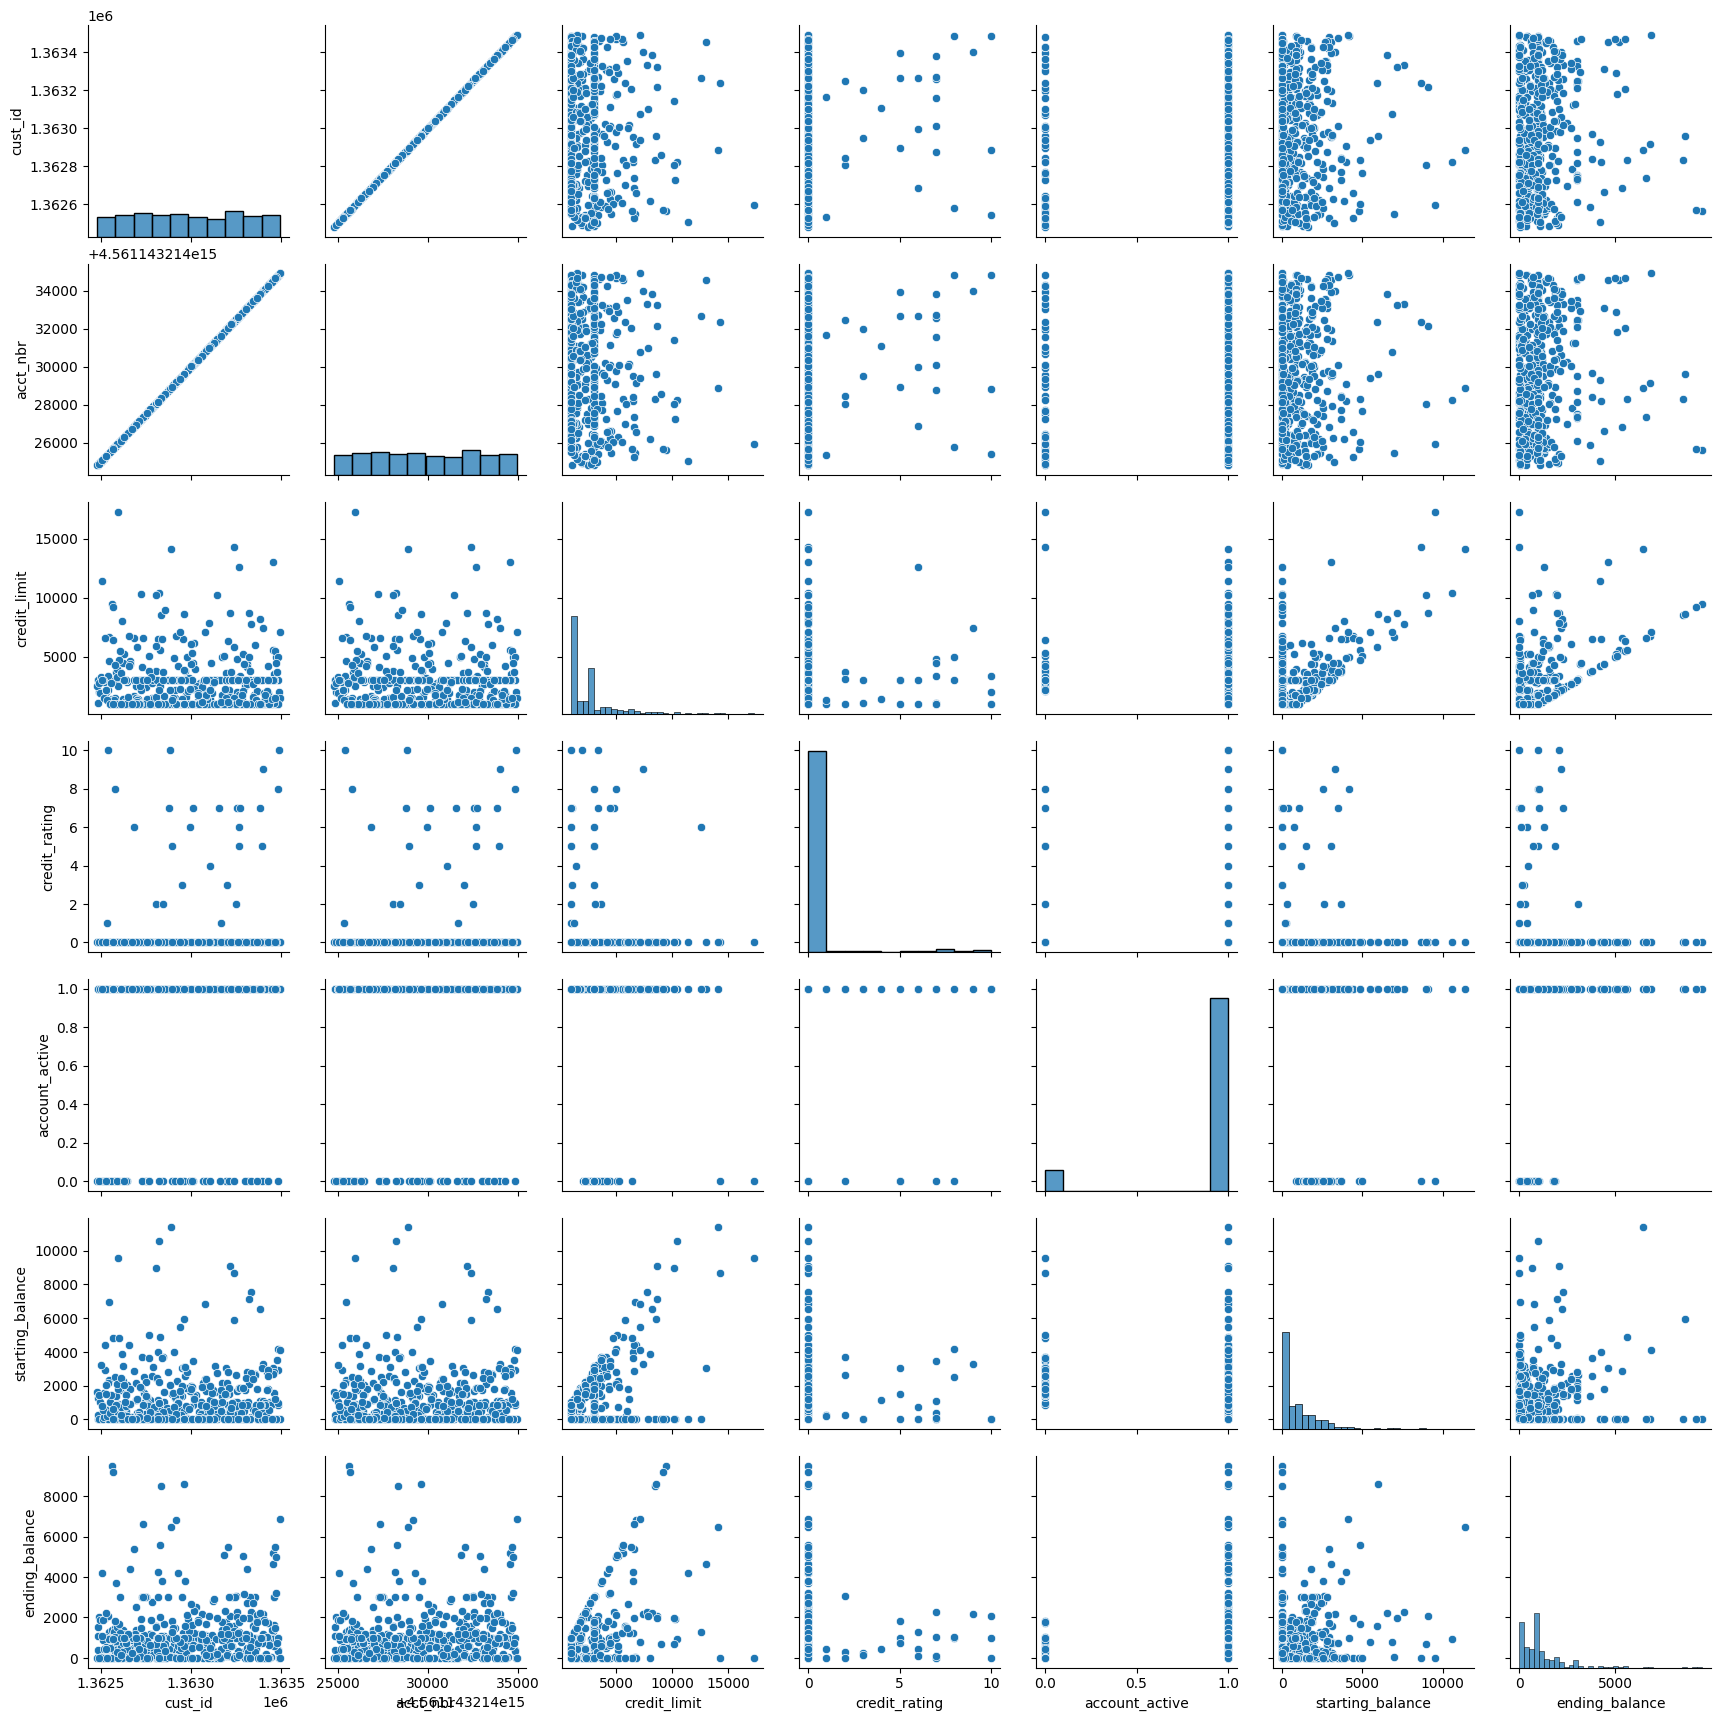

In [80]:
sns.pairplot(credit_acct_df)

## Credit Tran df Cleaning

In [81]:
credit_tran_df = pd.read_csv('data/twm_credit_tran.csv', sep=';')
credit_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [82]:
credit_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        20167 non-null  int64  
 1   tran_id        20167 non-null  int64  
 2   tran_amt       20167 non-null  float64
 3   principal_amt  20167 non-null  float64
 4   interest_amt   20167 non-null  float64
 5   new_balance    20167 non-null  float64
 6   tran_date      20167 non-null  object 
 7   tran_time      20167 non-null  object 
 8   channel        20167 non-null  object 
 9   tran_code      20167 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [83]:
# check duplicates
credit_tran_df.duplicated().sum()

0

In [84]:
# check nulls
credit_tran_df.isna().sum()

cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64

In [85]:
# convert dates and times
credit_tran_df['tran_date']= pd.to_datetime(credit_tran_df['tran_date'], format='%d.%m.%Y')
credit_tran_df['tran_time']= pd.to_datetime(credit_tran_df['tran_time'], format='%H%M%S', errors='coerce').dt.time
credit_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,1995-10-20,10:11:44,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,1995-10-13,08:31:15,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,1995-02-26,08:41:29,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,1995-01-03,19:18:15,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,1995-07-04,10:08:11,E,CG


Investigating missing times:

In [86]:
credit_tran_df.sort_values(by='tran_time')

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
7885,1363275,53,160.35,155.84,4.51,-637.17,1995-11-01,01:02:07,B,PM
990,1363356,29,-71.15,-71.15,0.00,-236.48,1995-07-03,01:02:08,E,CG
15118,1362683,92,-100.00,-100.00,0.00,-1595.83,1995-09-24,01:03:04,A,CA
8497,1363002,110,-116.31,-116.31,0.00,-3601.09,1995-09-20,01:03:07,E,CG
5321,1363229,20,-180.89,-180.89,0.00,-534.00,1995-04-15,01:04:03,E,CG
...,...,...,...,...,...,...,...,...,...,...
20134,1362726,1,1318.40,1297.13,21.27,-539.08,1995-01-06,NaN,M,PM
20137,1362978,28,2071.77,2071.77,0.00,-68.72,1995-04-05,NaN,M,PM
20140,1363414,30,41.09,40.95,0.14,-280.21,1995-10-07,NaN,M,PM
20149,1362804,37,2573.78,2573.78,0.00,0.00,1995-09-06,NaN,M,PM


In [87]:
credit_tran_df[credit_tran_df['tran_time'].isna()]['channel'].value_counts()

channel
M     3321
E        6
A        4
Name: count, dtype: int64

In [88]:
credit_tran_df[credit_tran_df['tran_time'].isna()]['tran_code'].value_counts()

tran_code
PM      3321
CG         6
CA         4
Name: count, dtype: int64

In [89]:
credit_tran_df[credit_tran_df['channel'] == 'E ']

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,1995-10-20,10:11:44,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,1995-10-13,08:31:15,E,CG
3,1363429,13,-195.27,-195.27,0.0,-1739.74,1995-01-03,19:18:15,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,1995-07-04,10:08:11,E,CG
6,1363008,28,-102.28,-102.28,0.0,-740.23,1995-08-13,12:20:55,E,CG
...,...,...,...,...,...,...,...,...,...,...
20159,1362552,46,-49.80,-49.80,0.0,-488.60,1995-09-21,09:08:36,E,CG
20160,1362806,4,-157.55,-157.55,0.0,-823.71,1995-01-17,08:54:10,E,CG
20161,1362820,46,-78.29,-78.29,0.0,-5344.47,1995-10-22,14:27:10,E,CG
20162,1363002,60,-94.52,-94.52,0.0,-3733.22,1995-05-20,22:47:23,E,CG


In [90]:
credit_tran_df[credit_tran_df['tran_code'] == 'CA  ']

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
5,1363303,20,-180.0,-180.0,0.0,-180.00,1995-08-08,20:35:28,A,CA
32,1363297,28,-200.0,-200.0,0.0,-580.56,1995-07-17,12:13:10,A,CA
38,1362888,80,-200.0,-200.0,0.0,-1479.14,1995-09-12,20:08:00,A,CA
43,1362945,20,-60.0,-60.0,0.0,-647.36,1995-06-13,16:55:14,A,CA
45,1362525,70,-120.0,-120.0,0.0,-928.57,1995-09-15,10:42:17,A,CA
...,...,...,...,...,...,...,...,...,...,...
20074,1363135,31,-140.0,-140.0,0.0,-247.32,1995-12-20,18:29:25,A,CA
20086,1363307,6,-160.0,-160.0,0.0,-661.32,1995-02-20,20:20:22,A,CA
20114,1363175,34,-60.0,-60.0,0.0,-720.07,1995-06-05,16:31:11,A,CA
20117,1362743,7,-40.0,-40.0,0.0,-620.44,1995-10-22,21:02:31,A,CA


In [91]:
credit_tran_df[credit_tran_df['channel']!= 'M '].isna().sum()

cust_id           0
tran_id           0
tran_amt          0
principal_amt     0
interest_amt      0
new_balance       0
tran_date         0
tran_time        10
channel           0
tran_code         0
dtype: int64

In [92]:
# drop missing times that are not channel== M
credit_tran_df = credit_tran_df.drop(credit_tran_df[(credit_tran_df['channel'].isin(['E ', 'A ']) & credit_tran_df['tran_time'].isna())].index)

In [93]:
credit_tran_df[credit_tran_df['tran_time'].isna()]['channel'].value_counts()

channel
M     3321
Name: count, dtype: int64

In [94]:
credit_tran_df.shape

(20157, 10)

In [101]:
# strip spaces from channel and tran_code
credit_tran_df['channel'] = credit_tran_df['channel'].str.strip()
credit_tran_df['tran_code'] = credit_tran_df['tran_code'].str.strip()

In [103]:
print(credit_tran_df['channel'].unique())
print(credit_tran_df['tran_code'].unique())

['E' 'K' 'A' 'M' 'C' 'B' 'V' '' 'H']
['CG' 'IQ' 'CA' 'PM' 'FA']


In [104]:
credit_tran_df.to_csv('clean_data/credit_tran_clean.csv', index=False)